# Sales Data Analysis

## Introduction
This notebook explores sales performance data from a global dataset containing transactions across various **countries**, **product lines**, and **years**.

The primary goal is to:
- Understand **overall revenue trends** from 2003 to 2005
- Identify the **top-performing product lines** and **markets**
- Uncover hidden insights using **data visualizations** and **exploratory data analysis (EDA)**


In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace this path with your actual file path
file_path = r"C:\Users\roshi\PycharmProjects\Sales Data Analysis\global_sales.csv"

# Load the CSV
df = pd.read_csv(file_path)

# Preview the first 50 rows
df.head(50)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,51100,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,75508,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,CA,94217,USA,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,Lille,NaN,59000,France,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,Bergen,NaN,N 5804,Norway,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,San Francisco,CA,NaN,USA,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,Paris,NaN,75016,France,Medium


**DATA UNDERSTANDING AND EXPLORATION**

In [3]:
df.shape


(2823, 19)

In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [5]:
#To view the data type in each column
df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
STATE               object
POSTALCODE          object
COUNTRY             object
DEALSIZE            object
dtype: object

In [6]:
#To know the info of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  CITY             2823 non-null   object 
 15  STATE            1337 non-null   object 
 16  POSTALCODE       2747 non-null   object 
 17  COUNTRY       

In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


**DATA TRANSFORMATION**

In [8]:
#Find missing values in each column of the data 
df.isnull().sum()


ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
DEALSIZE              0
dtype: int64

In [9]:
#Find duplicated data 
df.duplicated().sum()


0

In [10]:
# Missing values count & percentage
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print("\nMissing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")



Missing Values:
            Missing Count  Missing %
STATE                1486  52.639036
POSTALCODE             76   2.692171

Number of Duplicate Rows: 0


In [11]:
# Fill missing STATE values with 'Unknown' since this could be international entries
df['STATE'] = df['STATE'].fillna('Unknown')


In [12]:
df['POSTALCODE'] = df['POSTALCODE'].fillna('Unknown')


In [13]:
#Convert datetime column
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [14]:
df['Order_Year'] = df['ORDERDATE'].dt.year
df['Order_Month'] = df['ORDERDATE'].dt.month
df['Order_Weekday'] = df['ORDERDATE'].dt.day_name()


In [15]:
#Recheck missing count in each column
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
STATE              0
POSTALCODE         0
COUNTRY            0
DEALSIZE           0
Order_Year         0
Order_Month        0
Order_Weekday      0
dtype: int64

In [16]:
#df['TOTAL_REVENUE'] = df['QUANTITYORDERED'] * df['PRICEEACH']


In [17]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE,Order_Year,Order_Month,Order_Weekday
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small,2003,2,Monday
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,S10_1678,Reims Collectables,Reims,Unknown,51100,France,Small,2003,5,Wednesday
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,Paris,Unknown,75508,France,Medium,2003,7,Tuesday
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium,2003,8,Monday
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,Unknown,USA,Medium,2003,10,Friday


<Axes: ylabel='Density'>

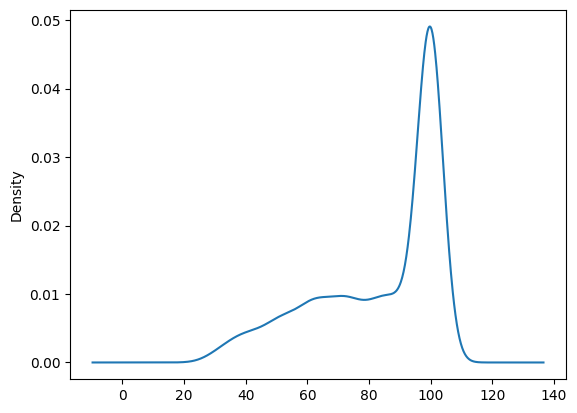

In [18]:
#To know the outlier in the 'PRICEEACH' column 
df['PRICEEACH'].plot(kind = 'kde')

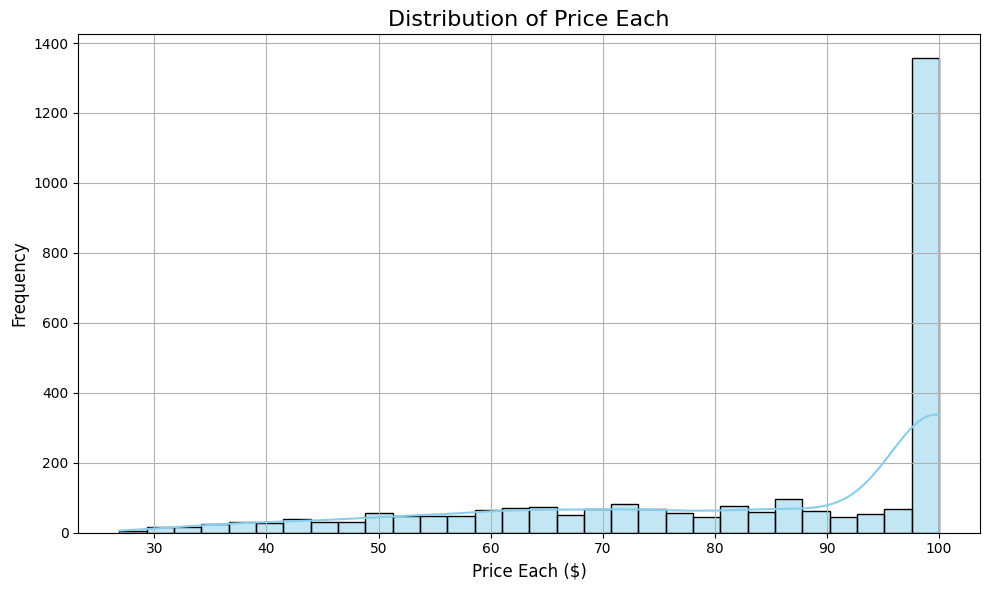

In [19]:
#Checking for Outlier in the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for PRICEEACH
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICEEACH'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Price Each', fontsize=16)
plt.xlabel('Price Each ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


No outlier found in PRICEEACH column

**ANALYSIS**


Correlation Matrix:


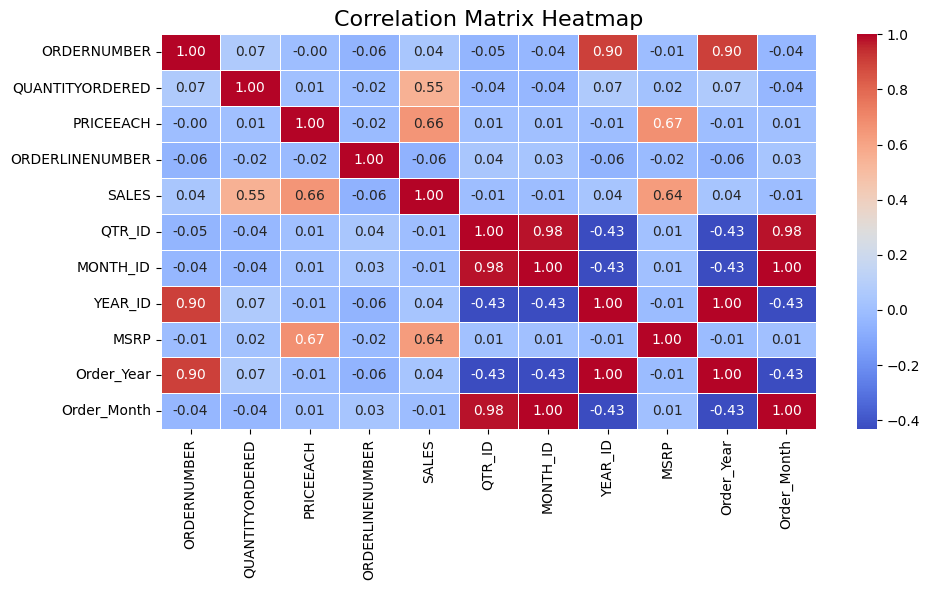

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("\nCorrelation Matrix:")
#print(correlation_matrix)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()



In [21]:
yearly_revenue = df.groupby('Order_Year')['SALES'].sum().reset_index()
yearly_revenue.columns = ['Order_Year', 'SALES']
yearly_revenue


,Order_Year,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


2004 recorded the highest total sales with **$4.72 million**, showing strong growth from 2003.

In [22]:
product_revenue = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).reset_index()
product_revenue.columns = ['Product_Line', 'SALES']
product_revenue


,Product_Line,SALES
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


**Classic Cars dominated sales across all product lines**, generating the highest revenue at **\$3.92 million**, while **Trains had the lowest**, contributing only **\$226K**, highlighting a strong customer preference for automobile collectibles.


In [23]:
monthly_revenue = df.groupby(['Order_Year', 'Order_Month'])['SALES'].sum().reset_index()
monthly_avg = df.groupby('Order_Month')['SALES'].mean().reset_index()
monthly_avg.columns = ['Month', 'Avg_Revenue']
monthly_avg


,Month,Avg_Revenue
0,1,3431.766114
1,2,3618.044196
2,3,3558.968821
3,4,3760.623371
4,5,3666.557778
5,6,3471.425802
6,7,3651.602624
7,8,3451.887801
8,9,3419.440175
9,10,3536.956530


In [24]:
# Group total revenue by year
revenue_by_year = df.groupby('Order_Year')['SALES'].sum().reset_index()

# Calculate YoY Growth %
revenue_by_year['YoY_Growth_%'] = revenue_by_year['SALES'].pct_change() * 100

# Replace NaN in first row with 'Base Year', others formatted to 2 decimal %
revenue_by_year['YoY_Growth_%'] = revenue_by_year['YoY_Growth_%'].map(
    lambda x: 'Base Year' if pd.isna(x) else f"{x:.2f}%"
)

# Display the final table
revenue_by_year


,Order_Year,SALES,YoY_Growth_%
0,2003,3516979.54,Base Year
1,2004,4724162.60,34.32%
2,2005,1791486.71,-62.08%


In [25]:
monthly_revenue = df.groupby(['Order_Year', 'Order_Month'])['SALES'].sum().reset_index()
monthly_avg = df.groupby('Order_Month')['SALES'].mean().reset_index()
monthly_avg.columns = ['Month', 'Avg_Revenue']
monthly_avg


,Month,Avg_Revenue
0,1,3431.766114
1,2,3618.044196
2,3,3558.968821
3,4,3760.623371
4,5,3666.557778
5,6,3471.425802
6,7,3651.602624
7,8,3451.887801
8,9,3419.440175
9,10,3536.956530


In [26]:
country_revenue = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()
country_revenue.columns = ['Country', 'SALES']
country_revenue


,Country,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


In [27]:
city_sales = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()
state_sales = df[df['STATE'].notnull()].groupby('STATE')['SALES'].sum().sort_values(ascending=False).reset_index()
city_sales


,CITY,SALES
0,Madrid,1082551.44
1,San Rafael,654858.06
2,NYC,560787.77
3,Singapore,288488.41
4,Paris,268944.68
5,San Francisco,224358.68
6,New Bedford,207874.86
7,Nantes,204304.86
8,Melbourne,200995.41
9,Brickhaven,165255.20


In [28]:
revenue_by_productline = df.groupby('PRODUCTLINE')['SALES'].agg(['sum', 'mean', 'count']).reset_index()
revenue_by_productline = revenue_by_productline.sort_values('sum', ascending=False)
revenue_by_productline


,PRODUCTLINE,sum,mean,count
0,Classic Cars,3919615.66,4053.377104,967
6,Vintage Cars,1903150.84,3135.339110,607
1,Motorcycles,1166388.34,3523.831843,331
5,Trucks and Buses,1127789.84,3746.810100,301
2,Planes,975003.57,3186.286176,306
3,Ships,714437.13,3053.150128,234
4,Trains,226243.47,2938.226883,77


In [29]:
# Group by PRODUCTLINE to get total quantity ordered per product
quantity_per_product = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index()

# Optional: sort by quantity in descending order to see top-selling products
quantity_per_product = quantity_per_product.sort_values(by='QUANTITYORDERED', ascending=False)

# Display the result
quantity_per_product.head(10)  # Top 10 products by quantity


,PRODUCTLINE,QUANTITYORDERED
0,Classic Cars,33992
6,Vintage Cars,21069
1,Motorcycles,11663
5,Trucks and Buses,10777
2,Planes,10727
3,Ships,8127
4,Trains,2712


C:\Users\roshi\AppData\Local\Temp\ipykernel_18440\798972515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productline_quantity.index, y=productline_quantity.values, palette='pastel')


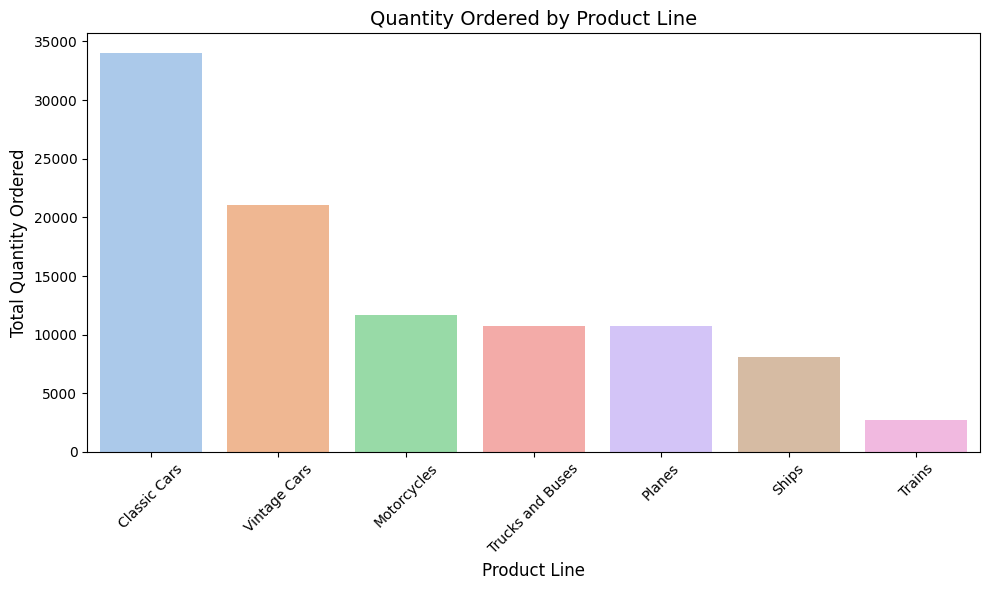

In [30]:
# Grouping data by Product Line and Quantity Ordered
productline_quantity = df.groupby("PRODUCTLINE")["QUANTITYORDERED"].sum().sort_values(ascending=False)

# Plotting a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=productline_quantity.index, y=productline_quantity.values, palette='pastel')
plt.title("Quantity Ordered by Product Line", fontsize=14)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# Step 1: Group and sort total sales by country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Step 2: Create the final table
country_table = country_sales.reset_index()
country_table.columns = ['Country', 'Total Sales']
country_table['Percentage of Total Sales (%)'] = (
    country_table['Total Sales'] / country_table['Total Sales'].sum() * 100
).round(2)

# Step 3: Display the table
country_table


,Country,Total Sales,Percentage of Total Sales (%)
0,USA,3627982.83,36.16
1,Spain,1215686.92,12.12
2,France,1110916.52,11.07
3,Australia,630623.10,6.29
4,UK,478880.46,4.77
5,Italy,374674.31,3.73
6,Finland,329581.91,3.29
7,Norway,307463.70,3.06
8,Singapore,288488.41,2.88
9,Denmark,245637.15,2.45


In [44]:
# Step 1: Filter for USA only
usa_df = df[df['COUNTRY'] == 'USA']

# Step 2: Get top 5 US cities by total sales
top_5_us_cities = usa_df.groupby('CITY')['SALES'].sum().nlargest(5).index

# Step 3: Filter and group by city & product line
bar_df_usa = usa_df[usa_df['CITY'].isin(top_5_us_cities)] \
    .groupby(['CITY', 'PRODUCTLINE'])['SALES'] \
    .sum().reset_index()

# Step 4: Create pivot table: Product Line vs City (Revenue)
revenue_table = bar_df_usa.pivot(index='PRODUCTLINE', columns='CITY', values='SALES').fillna(0)

# Optional: Round values for presentation
revenue_table = revenue_table.round(2)

# Display table
print("Revenue by Product Line in Top 5 US Cities")
display(revenue_table)


📊 Revenue by Product Line in Top 5 US Cities


CITY,Brickhaven,NYC,New Bedford,San Francisco,San Rafael
PRODUCTLINE,,,,,
Classic Cars,74917.27,260803.74,78619.00,47390.06,282079.44
Motorcycles,17095.41,98297.68,21615.73,62876.15,27181.10
Planes,20378.26,3789.72,39548.22,0.00,0.00
Ships,13071.35,39640.76,28548.36,8652.56,30886.58
Trains,0.00,16640.15,4925.23,0.00,21308.62
Trucks and Buses,0.00,68730.91,0.00,16230.65,124434.52
Vintage Cars,39792.91,72884.81,34618.32,89209.26,168967.80


**VISUALIZATION**

C:\Users\roshi\AppData\Local\Temp\ipykernel_18440\963689292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_year, x='Order_Year', y='SALES', palette='Blues_d')


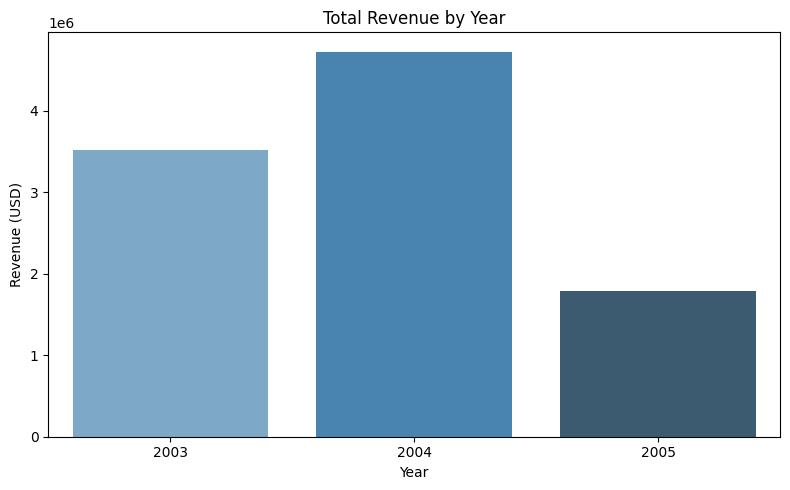

In [33]:
revenue_by_year = df.groupby('Order_Year')['SALES'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_year, x='Order_Year', y='SALES', palette='Blues_d')
plt.title('Total Revenue by Year')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


Total Revenue peaks in the year 2004 while 2005 has the lowest sales.

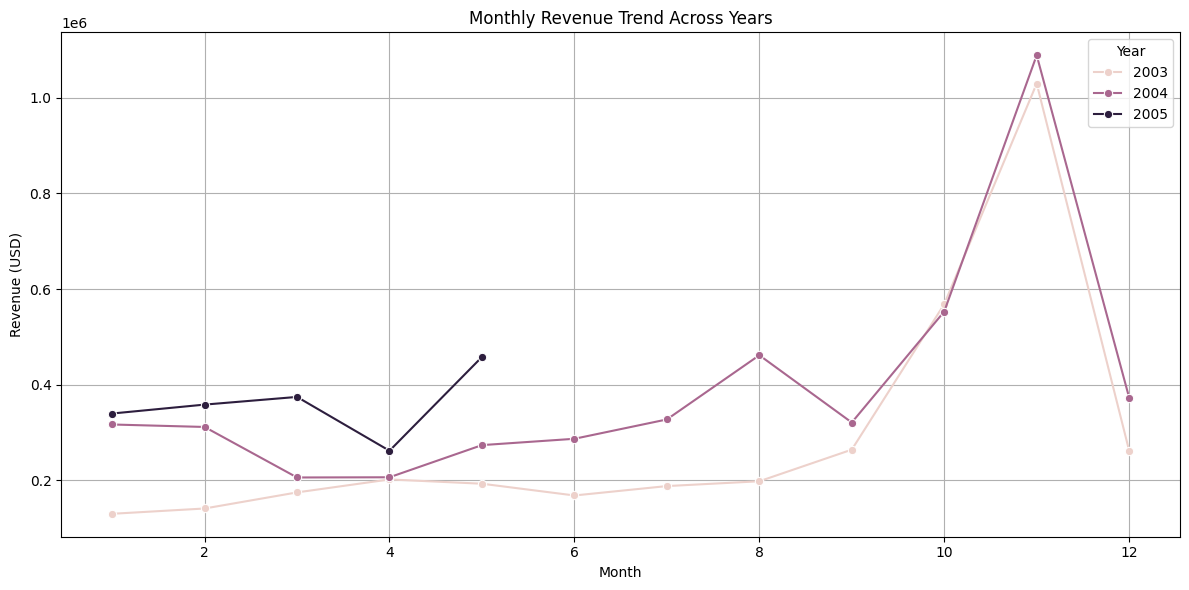

In [35]:
monthly_revenue = df.groupby(['Order_Year', 'Order_Month'])['SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Order_Month', y='SALES', hue='Order_Year', marker='o')
plt.title('Monthly Revenue Trend Across Years')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


Revenue is growing year over year, especially in the most recent year, 2004 especially in the month November.
Strong revenue quarters are Q4 and Q3. These periods can be targeted for future promotions or restocking strategies.
Sales in 2005 dropped because the data is only available until the 5th month (May) in the year 2005.

C:\Users\roshi\AppData\Local\Temp\ipykernel_18440\2114857740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_productline, x='SALES', y='PRODUCTLINE', palette='viridis')


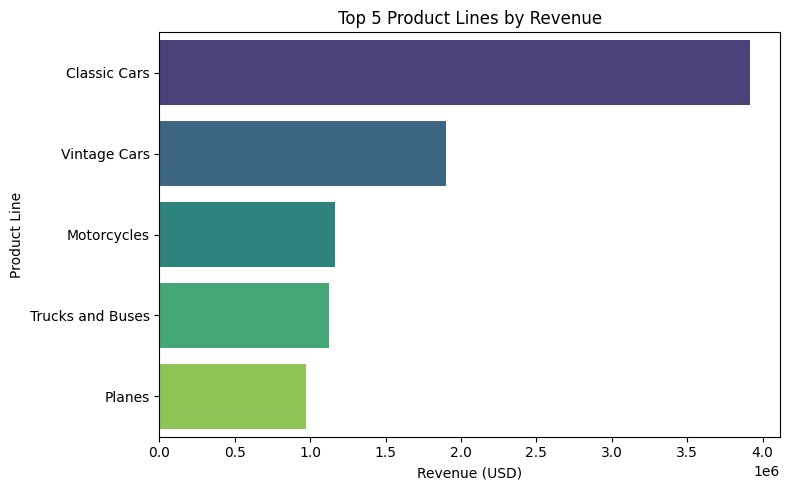

In [34]:
revenue_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_productline, x='SALES', y='PRODUCTLINE', palette='viridis')
plt.title('Top 5 Product Lines by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()


Classic Cars dominate the product lines, making up a significant chunk of total revenue.
High-Performing Products: Classic and Vintage Cars drive most sales.

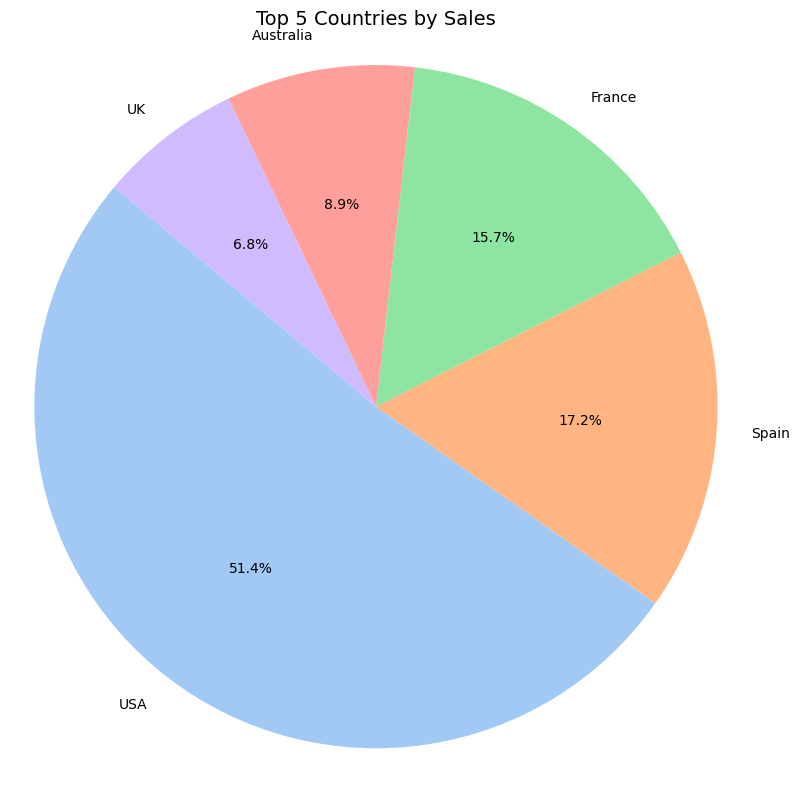

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and sort total sales by country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

# Step 2: Get top 5 countries by sales
top_5_sales = country_sales.head(5)

# Step 3: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_sales,
    labels=top_5_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', n_colors=5)
)
plt.title("Top 5 Countries by Sales", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()


USA has the highest sales compare to other countries and it holds 51.4% among the top 5 countries while 36.16% among all other countries. 
**USA leads global sales, followed by Spain and France. These should be considered key markets.**

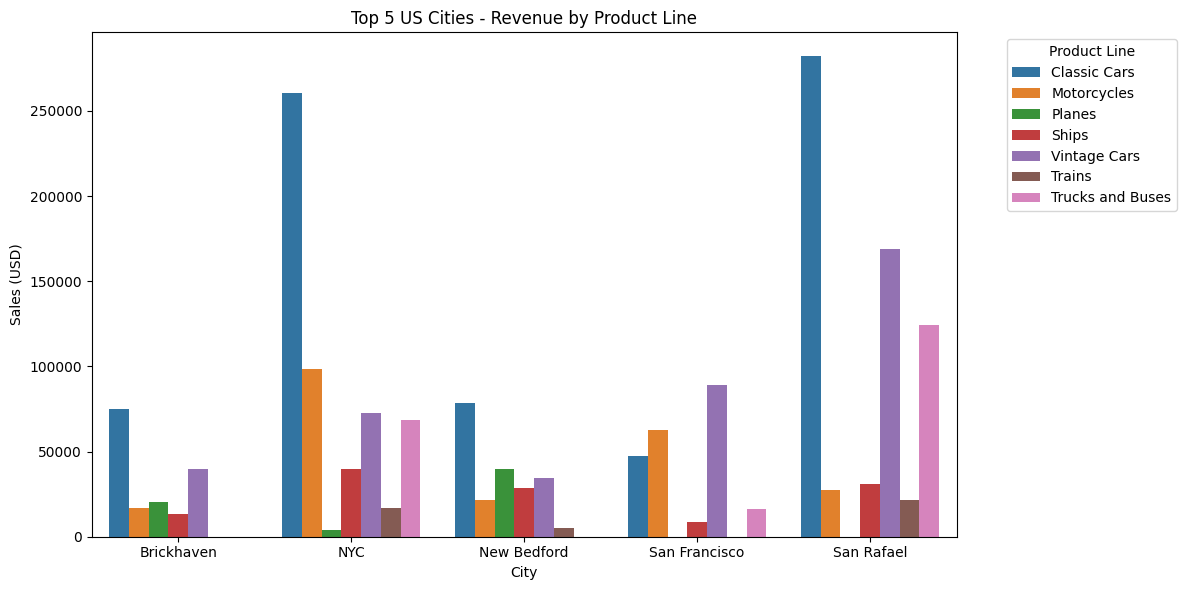

In [43]:
# Step 1: Filter for USA only
usa_df = df[df['COUNTRY'] == 'USA']

# Step 2: Get top 5 US cities by total sales
top_5_us_cities = usa_df.groupby('CITY')['SALES'].sum().nlargest(5).index

# Step 3: Filter and group by city & product line
bar_df_usa = usa_df[usa_df['CITY'].isin(top_5_us_cities)] \
    .groupby(['CITY', 'PRODUCTLINE'])['SALES'] \
    .sum().reset_index()

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=bar_df_usa, x='CITY', y='SALES', hue='PRODUCTLINE')
plt.title("Top 5 US Cities - Revenue by Product Line")
plt.ylabel("Sales (USD)")
plt.xlabel("City")
plt.legend(title="Product Line", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- NYC dominates in overall sales across almost every product line, especially Classic Cars and Motorcycles.

- San Rafael is a surprising second, with massive revenue in Classic Cars, Vintage Cars, and Trucks and Buses.

- Brickhaven and New Bedford are more balanced in revenue but lean heavily on Classic Cars.

- San Francisco underperforms overall, except for a standout in Vintage Cars sales.

- Trains and Planes are niche products, only selling notably in NYC, New Bedford, and San Rafael.

C:\Users\roshi\AppData\Local\Temp\ipykernel_18440\1092115953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_dealsize, x='DEALSIZE', y='Order_Count', palette='Set2')


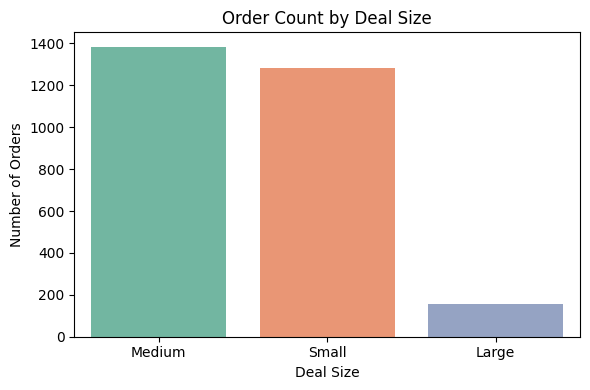

In [37]:
orders_by_dealsize = df['DEALSIZE'].value_counts().reset_index()
orders_by_dealsize.columns = ['DEALSIZE', 'Order_Count']

plt.figure(figsize=(6, 4))
sns.barplot(data=orders_by_dealsize, x='DEALSIZE', y='Order_Count', palette='Set2')
plt.title('Order Count by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Deal Size Distribution'}>

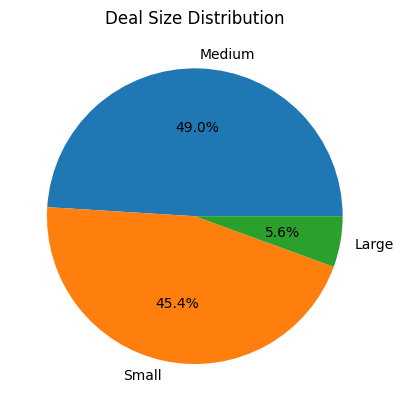

In [38]:
deal_product_ct = pd.crosstab(df['PRODUCTLINE'], df['DEALSIZE'])
df['DEALSIZE'].value_counts().plot.pie(autopct='%1.1f%%', title='Deal Size Distribution', ylabel='')


Medium-sized deals are most common. Strategies could be developed to upsell small deals or expand large deal volume.

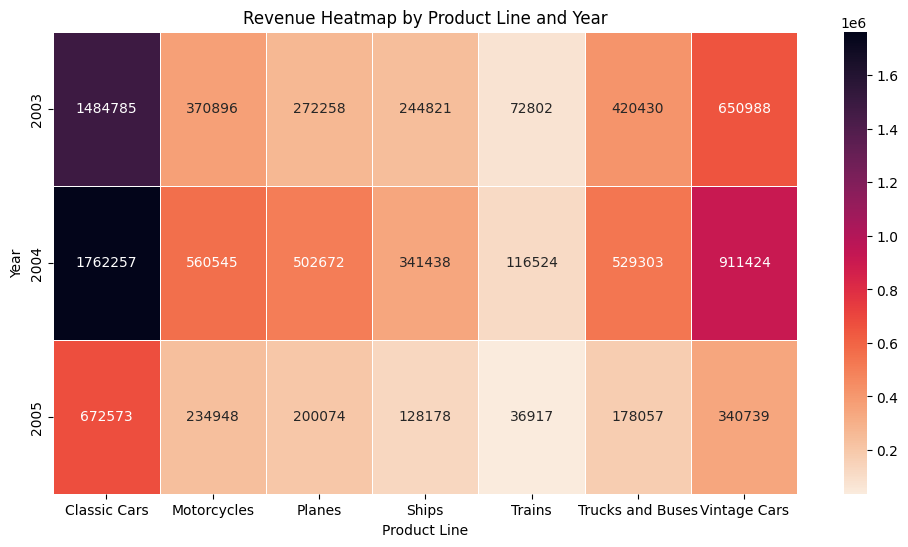

In [39]:
# Group data by Year and ProductLine
productline_revenue = df.groupby(['Order_Year', 'PRODUCTLINE'])['SALES'].sum().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(productline_revenue, annot=True, fmt=".0f", cmap="rocket_r", linewidths=0.5)
plt.title("Revenue Heatmap by Product Line and Year")
plt.xlabel("Product Line")
plt.ylabel("Year")
plt.show()


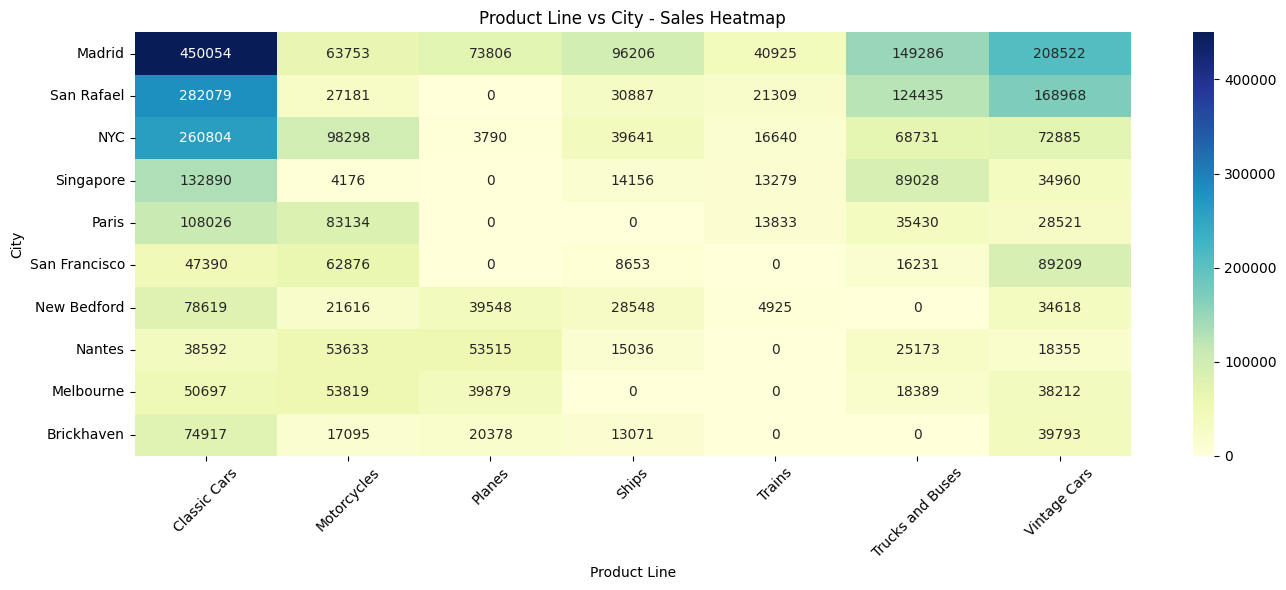

In [41]:
# Group by Product Line and City,the SALES
product_city_sales = df.groupby(['PRODUCTLINE', 'CITY'])['SALES'].sum().reset_index()
product_city_sales = product_city_sales.sort_values(by='SALES', ascending=False)
# Display top rows
#product_city_sales.head(10)

# Pivot for heatmap
pivot_heatmap = product_city_sales.pivot(index='CITY', columns='PRODUCTLINE', values='SALES').fillna(0)

# Optional: Top 10 cities only
top_cities = df.groupby('CITY')['SALES'].sum().nlargest(10).index
pivot_heatmap = pivot_heatmap.loc[top_cities]

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_heatmap, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Product Line vs City - Sales Heatmap")
plt.xlabel("Product Line")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Conclusion from Data Analysis and Visualization**:
- Peak Performance: The company saw its best revenue year in 2004.

- High-Performing Products: Classic and Vintage Cars drive most sales.

- Seasonal Trend: Q4 is the strongest quarter.

- Global Focus: The USA should remain the primary target market.

- Deal Strategy: Medium and small deals dominate — potential to grow large deals.

Suggestion for better analysis: Increase the training data to draw better conclusions as the data available only for three years from 2003 to 2005(mid).